## NBA球星投篮分布图

这里简单以西弟...不对，是西帝！本·西蒙斯的3年NBA生涯投篮为例，从NBA官方获取西帝的所有投篮数据，每条数据都包含他的球员ID、全名、所在球队、投篮时在球场的相对位置、比赛时间等。这次暂时只简单描绘投篮分布图，利用相对位置信息就好了。
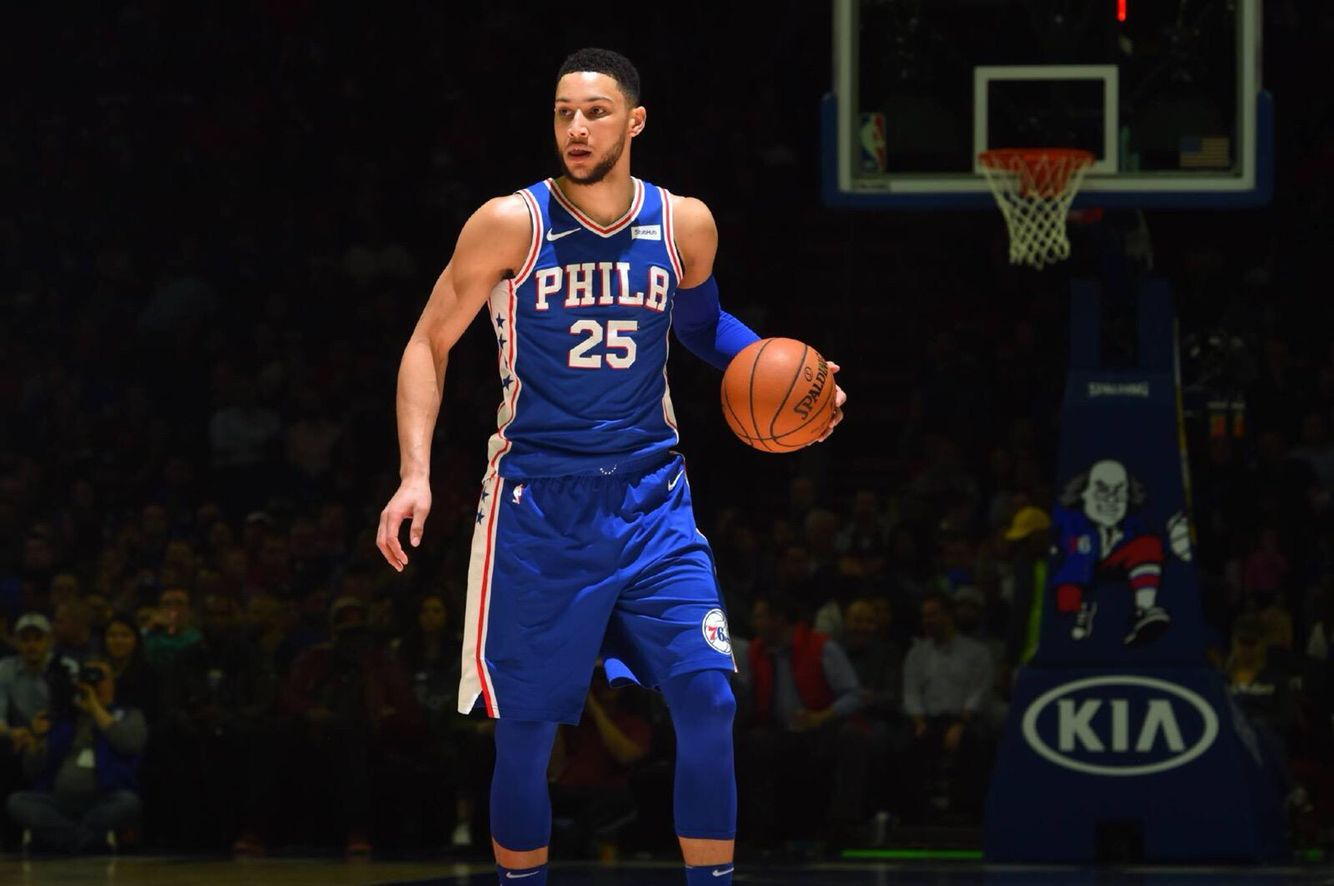

In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage
import pandas as pd
import numpy as np
from nba_api.stats.endpoints import shotchartdetail
import nbacourt

In [2]:
selected_player = shotchartdetail.ShotChartDetail(team_id=1610612755, player_id=1627732, context_measure_simple='FGA').shot_chart_detail.get_data_frame()

In [3]:
selected_player

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700006,33,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,9,44,...,Center(C),Less Than 8 ft.,3,-18,26,1,0,20171018,WAS,PHI
1,Shot Chart Detail,0021700006,47,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,8,28,...,Center(C),Less Than 8 ft.,1,12,11,1,1,20171018,WAS,PHI
2,Shot Chart Detail,0021700006,77,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,5,54,...,Right Side(R),8-16 ft.,9,73,55,1,1,20171018,WAS,PHI
3,Shot Chart Detail,0021700006,182,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,11,43,...,Center(C),Less Than 8 ft.,0,0,-6,1,1,20171018,WAS,PHI
4,Shot Chart Detail,0021700006,187,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,10,42,...,Center(C),Less Than 8 ft.,0,8,1,1,1,20171018,WAS,PHI
5,Shot Chart Detail,0021700006,193,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,52,...,Center(C),Less Than 8 ft.,6,-33,59,1,0,20171018,WAS,PHI
6,Shot Chart Detail,0021700006,195,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,46,...,Center(C),Less Than 8 ft.,0,0,-6,1,0,20171018,WAS,PHI
7,Shot Chart Detail,0021700006,209,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,21,...,Center(C),8-16 ft.,12,-64,113,1,0,20171018,WAS,PHI
8,Shot Chart Detail,0021700006,318,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,1,52,...,Center(C),Less Than 8 ft.,2,-9,19,1,1,20171018,WAS,PHI
9,Shot Chart Detail,0021700006,348,1627732,Ben Simmons,1610612755,Philadelphia 76ers,3,11,17,...,Right Side(R),8-16 ft.,11,79,80,1,0,20171018,WAS,PHI


In [4]:
made = selected_player[selected_player['SHOT_MADE_FLAG'] == 1]

In [5]:
missed = selected_player[selected_player['SHOT_MADE_FLAG'] == 0]

In [6]:
made

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
1,Shot Chart Detail,0021700006,47,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,8,28,...,Center(C),Less Than 8 ft.,1,12,11,1,1,20171018,WAS,PHI
2,Shot Chart Detail,0021700006,77,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,5,54,...,Right Side(R),8-16 ft.,9,73,55,1,1,20171018,WAS,PHI
3,Shot Chart Detail,0021700006,182,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,11,43,...,Center(C),Less Than 8 ft.,0,0,-6,1,1,20171018,WAS,PHI
4,Shot Chart Detail,0021700006,187,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,10,42,...,Center(C),Less Than 8 ft.,0,8,1,1,1,20171018,WAS,PHI
8,Shot Chart Detail,0021700006,318,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,1,52,...,Center(C),Less Than 8 ft.,2,-9,19,1,1,20171018,WAS,PHI
10,Shot Chart Detail,0021700006,501,1627732,Ben Simmons,1610612755,Philadelphia 76ers,3,1,40,...,Center(C),Less Than 8 ft.,2,3,25,1,1,20171018,WAS,PHI
12,Shot Chart Detail,0021700006,626,1627732,Ben Simmons,1610612755,Philadelphia 76ers,4,6,15,...,Center(C),Less Than 8 ft.,1,13,10,1,1,20171018,WAS,PHI
15,Shot Chart Detail,0021700019,86,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,5,47,...,Center(C),Less Than 8 ft.,2,-19,17,1,1,20171020,PHI,BOS
17,Shot Chart Detail,0021700019,236,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,8,16,...,Center(C),Less Than 8 ft.,1,-14,5,1,1,20171020,PHI,BOS
19,Shot Chart Detail,0021700019,371,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,0,39,...,Center(C),Less Than 8 ft.,2,21,-9,1,1,20171020,PHI,BOS


In [7]:
missed

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700006,33,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,9,44,...,Center(C),Less Than 8 ft.,3,-18,26,1,0,20171018,WAS,PHI
5,Shot Chart Detail,0021700006,193,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,52,...,Center(C),Less Than 8 ft.,6,-33,59,1,0,20171018,WAS,PHI
6,Shot Chart Detail,0021700006,195,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,46,...,Center(C),Less Than 8 ft.,0,0,-6,1,0,20171018,WAS,PHI
7,Shot Chart Detail,0021700006,209,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,21,...,Center(C),8-16 ft.,12,-64,113,1,0,20171018,WAS,PHI
9,Shot Chart Detail,0021700006,348,1627732,Ben Simmons,1610612755,Philadelphia 76ers,3,11,17,...,Right Side(R),8-16 ft.,11,79,80,1,0,20171018,WAS,PHI
11,Shot Chart Detail,0021700006,541,1627732,Ben Simmons,1610612755,Philadelphia 76ers,4,11,9,...,Center(C),8-16 ft.,11,-44,110,1,0,20171018,WAS,PHI
13,Shot Chart Detail,0021700006,630,1627732,Ben Simmons,1610612755,Philadelphia 76ers,4,5,34,...,Center(C),Less Than 8 ft.,2,6,22,1,0,20171018,WAS,PHI
14,Shot Chart Detail,0021700019,51,1627732,Ben Simmons,1610612755,Philadelphia 76ers,1,8,23,...,Center(C),8-16 ft.,9,11,90,1,0,20171020,PHI,BOS
16,Shot Chart Detail,0021700019,216,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,9,32,...,Center(C),Less Than 8 ft.,2,19,8,1,0,20171020,PHI,BOS
18,Shot Chart Detail,0021700019,264,1627732,Ben Simmons,1610612755,Philadelphia 76ers,2,6,13,...,Center(C),8-16 ft.,8,3,88,1,0,20171020,PHI,BOS


     从前面的步骤获取到投篮数据之后，就可以开始可视化展示了。
     球场的描绘我觉得是这次比较困难的一点，不过网上有相关的球场描绘代码，嗯，参考一下。
 
     侃侃球吧，西帝在NBA赛场上给人的感觉像是当代魔术师约翰逊，组织能力强，技术细腻，借助出色的身体天赋能够终结大部分近距离得分，唯一被人诟病的就是中远距离投篮了。
     做这次投篮分布图也可以看出，西帝很擅长篮下三秒区的终结，近距离区域的命中率特别高，西帝的投篮随着离篮筐距离越远，命中率就越低，三分线外更加不用说了，有看球的朋友应该对西帝本赛季唯二投进的三分球印象比较深，此外就没有其它亮点可言了。都说西帝的出手选择比较聪明（也有球迷说西帝进攻欲望冷淡...怂得像个弟弟，所以才叫西弟），从直方图可以看出，西帝极少会选择三秒区以外出手，就算是罚球线踏前两三步左右的出手也不算多，结合看球分析的话，我估计通常应该是碰到大个子正面防守，西帝也很聪明地选择分球给空位队友完成终结了。总体统计，即便投篮能力一般，西帝生涯常规赛命中率也能达到55.5%，才华还是可以的。


In [8]:
selected_player.SHOT_MADE_FLAG.mean()                         #可以算出总投篮命中率

0.5548216644649934

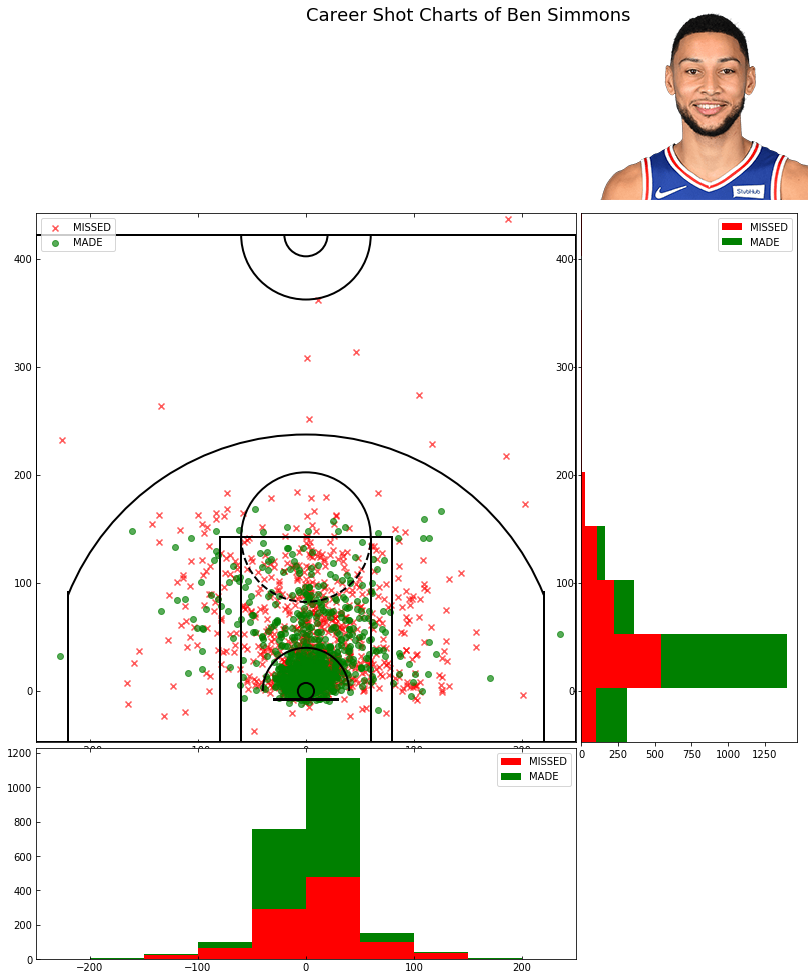

In [9]:
fig = plt.figure(figsize=(15, 14.7))
xbins = np.arange(-250, 300, 50)
ybins = np.arange(-47.5, 492.5, 50)

ax_scatter = plt.axes([0.1, 0.305, 0.5, 0.5])
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes([0.1, 0.1, 0.5, 0.2])
ax_histx.tick_params(direction='in', top=True)
ax_histy = plt.axes([0.605, 0.305, 0.2, 0.5])
nbacourt.draw_court(ax_scatter, outer_lines=True)
ax_scatter.set_xlim(-250, 250)
ax_scatter.set_ylim(-47.5, 442.5)
ax_scatter.scatter(missed.LOC_X, missed.LOC_Y, c='red', marker='x', alpha=0.65, label='MISSED')
ax_scatter.scatter(made.LOC_X, made.LOC_Y, c='green', marker='o', alpha=0.65, label='MADE')
ax_scatter.legend()
ax_histx.hist([missed.LOC_X, made.LOC_X], bins=xbins, range=(-250, 250), color=['red', 'green'], label=['MISSED', 'MADE'], stacked=True)
#ax_histx.hist(missed.LOC_X, bins=xbins, range=(-250, 250), color='red', label='MISSED', stacked=True)
#ax_histx.hist(made.LOC_X, bins=xbins, range=(-250, 250), color='green', label='MADE', stacked=True)
ax_histx.set_xlim(-250, 250)
ax_histx.legend()
ax_histy.hist([missed.LOC_Y, made.LOC_Y], bins=ybins, range=(-47.5, 442.5), color=['red', 'green'], label=['MISSED', 'MADE'], stacked=True, orientation='horizontal')
#ax_histy.hist(missed.LOC_Y, bins=ybins, range=(-47.5, 442.5), color='red', label='MISSED', stacked=True, orientation='horizontal')
#ax_histy.hist(made.LOC_Y, bins=ybins, range=(-47.5, 442.5), color='green', label='MADE', stacked=True, orientation='horizontal')
ax_histy.set_ylim(-47.5, 442.5)
ax_histy.legend()
portrait = plt.imread('https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/1610612755/2019/260x190/1627732.png')
plt.suptitle('Career Shot Charts of ' + selected_player.PLAYER_NAME[0], y=1, fontsize=18)
img = OffsetImage(portrait)
img.set_offset((580, 780))
fig.gca().add_artist(img)